# AI Mercado
  Tatan y los demas

##  Detalles del Conjunto de Datos

Conjunto de Datos sobre Precios de la Canasta Familiar en Manizales
Este conjunto de datos contiene información detallada con un historico de 10 años sobre los precios de los productos que componen la canasta familiar en Manizales. Los datos incluyen información sobre el precio de diferentes productos en mercados locales, con información proveniente de fuentes oficiales como el DANE. Es útil para economistas, analistas de datos y desarrolladores de modelos de inteligencia artificial que desean analizar las fluctuaciones de los precios y su impacto en el costo de vida.

##  Características del Conjunto de Datos

Información Básica de los Productos:

Fecha: Fecha en que se registró el precio (formato: año, mes).

Grupo: Grupo al que pertenece el producto (ej. Carnes, Procesados, etc.).

Producto: Nombre específico del producto (ej. arroz, carne, aceite).

Mercado: Manizales, Centro Galerías.

Precio_kg: Precio del producto por kilogramo.

Fuente: DANE

In [2]:
# @title Conexión con la base de datos desde una URL

# Definir una lista de archivos con sus IDs y nombres
archivos = [
    {'file_id': '1p-7F4efsfUwmhAAxN7j-_debeoiYhb6Y', 'nombre_archivo': '2013.csv'},
    {'file_id': '18xo5sBtXsKa7jouioxnUeH8lU-wKSqQb', 'nombre_archivo': '2014.csv'},
    {'file_id': '1IbRuk5OZ0duErgMTRjcJueWo1SvZVv_3', 'nombre_archivo': '2015.csv'},
    {'file_id': '1HgW43L5A9CcE2Gxc6dakPtrhVmkJ8C5m', 'nombre_archivo': '2016.csv'},
    {'file_id': '1FhTNT2KeeMBGOKtRSzlhtPo9z8j8l9PV', 'nombre_archivo': '2017.csv'},
    {'file_id': '1iQeEzs6mkUgd-vVMBA7U-wVpLJrHaixI', 'nombre_archivo': '2018.csv'},
    {'file_id': '1762gb92eCL3c28bNmeswBvkR9unLQhe0', 'nombre_archivo': '2019.csv'},
    {'file_id': '1xBOgFS4XrZGBxLFfaMZ0ppemXe_DUATF', 'nombre_archivo': '2020.csv'},
    {'file_id': '1zsKlwymfu1X6Ubn1OIiVD4OlZwZaWA3T', 'nombre_archivo': '2021.csv'},
    {'file_id': '1yWQGO4kzqXs_a0VoG1PZZusZItmR0W3s', 'nombre_archivo': '2022.csv'},
    {'file_id': '1R3T083y9pgUG0AnaHo5UK-bIfLU0Ajur', 'nombre_archivo': '2023.csv'},
    {'file_id': '1Tau-nzN3Ey42wIvKkw3tQAV-ZGakZ1Gq', 'nombre_archivo': '2024.csv'},
    # Agrega más archivos si es necesario
]

# Descargar todos los archivos de la lista
for archivo in archivos:
    file_id = archivo['file_id']
    nombre_archivo = archivo['nombre_archivo']

    # Ejecutar el comando para descargar cada archivo
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$file_id -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$file_id -O $nombre_archivo && rm -rf /tmp/cookies.txt


--2024-11-05 21:11:45--  https://docs.google.com/uc?export=download&confirm=&id=1p-7F4efsfUwmhAAxN7j-_debeoiYhb6Y
Resolving docs.google.com (docs.google.com)... 74.125.20.101, 74.125.20.139, 74.125.20.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1p-7F4efsfUwmhAAxN7j-_debeoiYhb6Y&export=download [following]
--2024-11-05 21:11:45--  https://drive.usercontent.google.com/download?id=1p-7F4efsfUwmhAAxN7j-_debeoiYhb6Y&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3970867 (3.8M) [application/octet-stream]
Saving to: ‘2013.csv’

2013.csv            100%[===================>]   3.79M  --.-KB/s    

# Desglose:
aqui va mas inforamcion adiconal como ubicacion de la descarga de df

## Importacion de librerias y Funciones

### Autenticador del Drive, Instalacion y importacion de librerias

In [3]:
# @title Autenticador del Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# @title Instalar librerias a usar
!pip install pandas-profiling
!pip install pyxlsb
!pip install sweetviz
!pip install category_encoders

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a30cbe2b2f3a8e1bd85f963390d35f2f8dd3e4f4aba0be7cc83977fc9f2d1f6b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.4 MB/s eta 0:00:00


In [5]:
# @title Carga de librerias
import os
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import sweetviz as sv
from google.colab import files
from collections import Counter
import category_encoders as ce
from collections import defaultdict
from sklearn.preprocessing import OneHotEncoder

### Funciones

In [6]:
# @title Analiza las columnas del df
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)

In [7]:
# @title Muestra el numero de valores unicos en cada columna de todos los df de la lista de DataFrame
def mostrar_valores_unicos(dataframes):
    """
    Función que muestra la cantidad de valores únicos para cada columna
    en cada DataFrame dentro de una lista.

    Args:
    dataframes (list): Lista de DataFrames.

    """
    # Iteramos sobre cada DataFrame en la lista
    for i, df in enumerate(dataframes):
        print(f"Valores únicos en el DataFrame {i+13}:")  # El +13 es para alinearlo con el número del DataFrame original

        # Usamos nunique() para contar los valores únicos en cada columna
        valores_unicos = df.nunique()

        # Imprimimos la cantidad de valores únicos para cada columna
        for columna in df.columns:
            print(f" - {columna}: {valores_unicos[columna]} valores únicos")

        print()  # Línea en blanco para separar resultados entre DataFrames


In [8]:
# @title Indica la informacion de cada df en la lista de DataFrame
def mostrar_info_dataframes(dataframes):
    """
    Función que muestra la información de cada DataFrame en una lista de DataFrames
    usando el método .info() de Pandas.

    Args:
    dataframes (list): Lista de DataFrames.
    """
    # Iteramos sobre cada DataFrame en la lista
    for i, df in enumerate(dataframes):
        print(f"Información del DataFrame {i+13}:")  # +13 para reflejar el índice de tus DataFrames

        # Aplicamos el método .info() a cada DataFrame
        df.info()

        print()  # Línea en blanco para separar los resultados entre DataFrames


In [9]:
# @title Obtener que valores unicos tiene cualquier columna de todos los df de la lista
def obtener_valores_comunes(dataframes, columna):
    """
    Función que obtiene los valores únicos que están presentes en la mayoría de los DataFrames
    en la columna especificada.

    Args:
    dataframes (list): Lista de DataFrames.
    columna (str): Nombre de la columna a analizar.

    Returns:
    list: Lista de valores comunes presentes en la mayoría de los DataFrames.
    """
    # Diccionario para contar en cuántos DataFrames aparece cada valor único
    frecuencia_valores = Counter()

    # Paso 1: Identificar los valores únicos de la columna en cada DataFrame
    for df in dataframes:
        valores_unicos = set(df[columna].unique())  # Usamos set() para evitar duplicados dentro del mismo DataFrame
        frecuencia_valores.update(valores_unicos)   # Actualizamos el contador con los valores únicos del DataFrame

    # Paso 2: Determinar cuántos DataFrames forman la mayoría
    umbral = len(dataframes) // 2

    # Paso 3: Filtrar solo los valores que aparecen en al menos la mitad de los DataFrames
    valores_comunes = [valor for valor, count in frecuencia_valores.items() if count > umbral]

    return valores_comunes

In [10]:
# @title Elimina los valores que no se encuentren en todos los df de la lista para cualquier columna en especifico
def eliminar_valores_no_comunes(dataframes, columna):
    """
    Función que filtra los DataFrames para que solo conserven los valores comunes a todos
    los DataFrames de una columna específica.

    Args:
    dataframes (list): Lista de DataFrames a procesar.
    columna (str): Nombre de la columna sobre la cual se realizará el filtrado.

    Returns:
    int: El número total de filas eliminadas en el proceso.
    """
    # Paso 1: Obtener los valores únicos de la columna especificada en el primer DataFrame
    valores_comunes = set(dataframes[0][columna].unique())  # Tomamos los valores únicos del primer DataFrame

    # Iterar sobre los demás DataFrames y calcular la intersección de valores únicos
    for df in dataframes[1:]:
        valores_comunes.intersection_update(set(df[columna].unique()))  # Mantener solo los comunes

    # Almacenar un indicador de si se eliminaron filas
    filas_eliminadas_totales = 0

    print(f"Valores comunes en todos los DataFrames de la columna '{columna}' que se mantendrán:", valores_comunes)

    # Paso 2: Filtrar cada DataFrame en la lista para mantener solo los valores comunes
    for i, df in enumerate(dataframes):
        # Filtrar el DataFrame para que solo contenga los valores comunes de la columna especificada
        df_filtrado = df[df[columna].isin(valores_comunes)]

        # Calcular cuántas filas se eliminaron
        filas_eliminadas = len(df) - len(df_filtrado)
        filas_eliminadas_totales += filas_eliminadas  # Acumulamos el total de filas eliminadas

        # Reemplazar el DataFrame original con el filtrado
        dataframes[i] = df_filtrado

    # Imprimir mensaje final si se eliminaron filas
    if filas_eliminadas_totales > 0:
        print(f"Se eliminaron un total de {filas_eliminadas_totales} filas de los DataFrames.")
    else:
        print(f"No se encontraron valores diferentes en la columna '{columna}' en los DataFrames. No se eliminaron filas.")

    return filas_eliminadas_totales

# Seccion 1

## Paso 1: Cargar y eliminar columnas vacias de bases de datos

In [240]:
# @title Cargar el archivo CSV del comercio en cada año
df13 = pd.read_csv('2013.csv')
df14 = pd.read_csv('2014.csv')
df15 = pd.read_csv('2015.csv')
df16 = pd.read_csv('2016.csv')
df17 = pd.read_csv('2017.csv')
df18 = pd.read_csv('2018.csv')
df19 = pd.read_csv('2019.csv')
df20 = pd.read_csv('2020.csv')
df21 = pd.read_csv('2021.csv')
df22 = pd.read_csv('2022.csv')
df23 = pd.read_csv('2023.csv')
df24 = pd.read_csv('2024.csv')  # Base de datos año 2024

In [241]:
# @title Eliminacion de Columnas Vacias (Unnamed)
datos = [df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23]
for df in datos:
    df.dropna(axis=1, how='all', inplace=True)

## Paso 2: Filtrado de datos

1. Se enfoca en solo para Manizales
2. Eliminacion de productos menores a 10
3. Clasificamos solo los valores unicos en todos los DataFrame para Grupos y Productos
4. Corregir filas de la columna Fecha
5. Completar datos faltantes de productos por meses
6. Corregir valores incoerentes de los precios

In [242]:
# @title # 1. Iterar sobre cada DataFrame para filtrar las filas donde "Mercado" contiene "Manizales"
# Filtrado de todos los DataFrame agrupados a una lista, donde solo se enfocara solo en Manizales.
datos_filtrados = []
for df in datos:
    # Filtrar filas donde la columna "Mercado" contiene la palabra "Manizales"
    filtrado = df[df['Mercado'].str.contains(r'\bManizales\b', case=False, na=False)]
    #df13.reset_index(drop=True, inplace=True)
    datos_filtrados.append(filtrado)

print(f"Numero de DataFrames filtrados por Manizales: {len(datos_filtrados)}")

Numero de DataFrames filtrados por Manizales: 11


In [243]:
# @title # 2. Se elimina productos con menos de 10 iteraciones unicas por año para evitar valores atipicos.
N = 10  # Numero maximo de productos para filtrar
for i, df in enumerate(datos_filtrados):
    # Guardar el número de filas antes del filtrado
    filas_antes = len(df)
    # Contar las ocurrencias de cada valor único en la columna 'Producto'
    conteo_productos = df['Producto'].value_counts()

    # Obtener los productos que aparecen al menos 10 veces
    productos_validos = conteo_productos[conteo_productos >= N].index

    # Filtrar el DataFrame para mantener solo los productos válidos
    df_filtrado = df[df['Producto'].isin(productos_validos)]

    # Guardar el número de filas después del filtrado
    filas_despues = len(df_filtrado)
    # Calcular el número de filas eliminadas
    filas_eliminadas = filas_antes - filas_despues

    # Reemplazar el DataFrame original por el filtrado
    datos_filtrados[i] = df_filtrado

    # Imprimir el mensaje con el número de datos eliminados
    print(f"DataFrame {i+13} filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: {filas_eliminadas}.")

DataFrame 13 filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: 60.
DataFrame 14 filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: 4.
DataFrame 15 filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: 78.
DataFrame 16 filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: 13.
DataFrame 17 filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: 16.
DataFrame 18 filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: 37.
DataFrame 19 filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: 71.
DataFrame 20 filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: 39.
DataFrame 21 filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: 27.
DataFrame 22 filtrado. Productos con menos de 10 ocurrencias eliminados. Filas eliminadas: 24.
DataFrame 23 filtrado. Productos con menos de 10 oc

In [244]:
# @title  # 3. Se elimina valores no comunes en Grupos y Producto
# Para la columna "Grupo"
eliminar_valores_no_comunes(datos_filtrados, "Grupo")

# Para la columna "Producto"
eliminar_valores_no_comunes(datos_filtrados, "Producto")

Valores comunes en todos los DataFrames de la columna 'Grupo' que se mantendrán: {'LACTEOS Y HUEVOS', 'FRUTAS', 'VERDURAS Y HORTALIZAS', 'TUBERCULOS, RAICES Y PLATANOS', 'GRANOS Y CEREALES', 'CARNES', 'PESCADOS', 'PROCESADOS'}
Se eliminaron un total de 221 filas de los DataFrames.
Valores comunes en todos los DataFrames de la columna 'Producto' que se mantendrán: {'Carne de cerdo, pernil sin hueso', 'Huevo blanco extra', 'Brócoli', 'Naranja Valencia', 'Chócolo mazorca', 'Papa capira', 'Fríjol verde en vaina', 'Maracuyá', 'Habichuela', 'Banano criollo', 'Uva red globe nacional', 'Coco', 'Papaya Maradol', 'Queso costeño', 'Coliflor', 'Sardinas en lata', 'Manzana roja importada', 'Cebolla cabezona blanca', 'Harina de trigo', 'Guayaba agria', 'Huevo blanco A', 'Pera importada', 'Mandarina Oneco', 'Trucha en corte mariposa', 'Azúcar sulfitada', 'Yuca ICA', 'Limón Tahití', 'Fresa', 'Carne de cerdo, tocino papada', 'Mango Tommy', 'Apio', 'Tomate de árbol', 'Arracacha blanca', 'Cebolla junca',

4244

In [245]:
# @title  # 4. Corregir fechas que estan mal escritas para codificar
# Iterar sobre los primeros 6 DataFrames de la lista
for i in range(6):
    # Reemplazar "sept-" por "sep-" en la columna "Fecha" del DataFrame
    datos_filtrados[i]['Fecha'] = datos_filtrados[i]['Fecha'].str.replace('sept-', 'sep-')


In [246]:
# @title # 5. Completar datos faltantes
# Contador de productos completados
total_completados = 0

# Proceso de cálculo y completación para cada DataFrame en la lista 'datos_filtrados'
for idx, df in enumerate(datos_filtrados):
    productos_faltantes = []  # Lista para almacenar los productos que serán añadidos

    # Contar el número de apariciones de cada producto
    conteo_productos = df['Producto'].value_counts()

    # Identificar productos que aparecen menos de 12 veces
    productos_bajos = conteo_productos[conteo_productos < 12].index

    for producto in productos_bajos:
        # Calcular cuántas veces aparece el producto
        cantidad_actual = conteo_productos[producto]
        faltantes = 12 - cantidad_actual

        # Obtener el precio promedio del producto
        promedio_precio = df[df['Producto'] == producto]['Precio_kg'].mean()  # Cambia 'Precio_kg' si es necesario

        # Crear nuevas filas hasta completar 12 apariciones
        for _ in range(faltantes):
            nueva_fila = df[df['Producto'] == producto].iloc[0].copy()  # Copiar la fila existente
            nueva_fila['Precio_kg'] = promedio_precio  # Asignar el precio promedio
            productos_faltantes.append(nueva_fila)  # Agregar a la lista de productos faltantes

        total_completados += faltantes

    # Agregar las nuevas filas al DataFrame original
    datos_filtrados[idx] = pd.concat([df, pd.DataFrame(productos_faltantes)], ignore_index=True)

# Imprimir el total de productos completados
print(f"Total de productos completados: {total_completados}")


Total de productos completados: 189


In [247]:
# @title # 6. Corregir valores incoerentes de los precios
# Iterar sobre cada DataFrame en la lista
for i, df in enumerate(datos_filtrados):
    # Aplicar la condición y la multiplicación en la columna "Precio_kg"
     df['Precio_kg'] = df['Precio_kg'].apply(lambda x: x * 1000 if 0 <= x < 10 else (x * 100 if 10 <= x < 100 else x))

    # Actualizar el DataFrame en la lista
     datos_filtrados[i] = df


In [248]:
# # Corregir el DataFrame en la posición 9
# if columna in datos_filtrados[9].columns:
#     datos_filtrados[9][columna] = datos_filtrados[9][columna] * 10

# # Corregir el DataFrame en la posición 10
# if columna in datos_filtrados[10].columns:
#     datos_filtrados[10][columna] = datos_filtrados[10][columna] * 10


## Paso 3: Explorar los datos

Vamos a verificar la estructura de los datos, la cantidad de filas y columnas, así como cualquier dato vacío y Concatenamos todos los df de la lista de DataFrame a un solo df_general

In [249]:
# @title Aplicar la función de obtener valore comunes a la columna 'Grupo' en la lista de DataFrames
grupos_comunes = obtener_valores_comunes(datos_filtrados, 'Grupo')

# Imprimir los grupos comunes
print("Grupos que se mantendrán en los DataFrames son: ",len(grupos_comunes))
grupos_comunes

Grupos que se mantendrán en los DataFrames son:  8


['LACTEOS Y HUEVOS',
 'FRUTAS',
 'TUBERCULOS, RAICES Y PLATANOS',
 'GRANOS Y CEREALES',
 'VERDURAS Y HORTALIZAS',
 'CARNES',
 'PESCADOS',
 'PROCESADOS']

In [250]:
# @title Aplicar la función de obtener valores comunes a la columna 'Producto' en la lista de DataFrames
Productos_comunes = obtener_valores_comunes(datos_filtrados, 'Producto')

# Imprimir los Productos comunes
print("Productos que se mantendrán en los DataFrames son: ",len(Productos_comunes))
Productos_comunes

Productos que se mantendrán en los DataFrames son:  83


['Carne de cerdo, pernil sin hueso',
 'Huevo blanco extra',
 'Brócoli',
 'Naranja Valencia',
 'Chócolo mazorca',
 'Papa capira',
 'Fríjol verde en vaina',
 'Maracuyá',
 'Habichuela',
 'Banano criollo',
 'Uva red globe nacional',
 'Coco',
 'Papaya Maradol',
 'Queso costeño',
 'Coliflor',
 'Sardinas en lata',
 'Manzana roja importada',
 'Cebolla cabezona blanca',
 'Harina de trigo',
 'Guayaba agria',
 'Huevo blanco A',
 'Pera importada',
 'Mandarina Oneco',
 'Trucha en corte mariposa',
 'Azúcar sulfitada',
 'Yuca ICA',
 'Limón Tahití',
 'Fresa',
 'Carne de cerdo, tocino papada',
 'Mango Tommy',
 'Apio',
 'Tomate de árbol',
 'Arracacha blanca',
 'Cebolla junca',
 'Guayaba pera',
 'Lechuga Batavia',
 'Repollo verde',
 'Lulo',
 'Remolacha',
 'Perejil',
 'Arroz de primera',
 'Bocachico importado congelado',
 'Piña gold',
 'Panela redonda morena',
 'Huevo blanco AA',
 'Arveja verde seca importada',
 'Ajo',
 'Granadilla',
 'Pimentón',
 'Ahuyama',
 'Harina precocida de maíz',
 'Berenjena',
 'Ma

In [251]:
# @title Podemos mirar el numero de valores unicos de cada DataFrame
# Imprimimos la cantidad de valores únicos para cada columna con la funcion creada
mostrar_valores_unicos(datos_filtrados)

Valores únicos en el DataFrame 13:
 - Fecha: 12 valores únicos
 - Grupo: 8 valores únicos
 - Producto: 83 valores únicos
 - Mercado: 1 valores únicos
 - Precio_kg: 726 valores únicos

Valores únicos en el DataFrame 14:
 - Fecha: 12 valores únicos
 - Grupo: 8 valores únicos
 - Producto: 83 valores únicos
 - Mercado: 1 valores únicos
 - Precio_kg: 703 valores únicos

Valores únicos en el DataFrame 15:
 - Fecha: 12 valores únicos
 - Grupo: 8 valores únicos
 - Producto: 83 valores únicos
 - Mercado: 1 valores únicos
 - Precio_kg: 792 valores únicos

Valores únicos en el DataFrame 16:
 - Fecha: 12 valores únicos
 - Grupo: 8 valores únicos
 - Producto: 83 valores únicos
 - Mercado: 1 valores únicos
 - Precio_kg: 793 valores únicos

Valores únicos en el DataFrame 17:
 - Fecha: 12 valores únicos
 - Grupo: 8 valores únicos
 - Producto: 83 valores únicos
 - Mercado: 1 valores únicos
 - Precio_kg: 764 valores únicos

Valores únicos en el DataFrame 18:
 - Fecha: 12 valores únicos
 - Grupo: 8 valor

##  Paso 4: Concatenamos toda las listas de DataFrame

In [252]:
# @title  Toda la informacion estara en un solo df llamado df_general
df_general = pd.concat(datos_filtrados, ignore_index=True)
print(df_general.info())  # Verificar la estructura del DataFrame general
df_general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha      10956 non-null  object 
 1   Grupo      10956 non-null  object 
 2   Producto   10956 non-null  object 
 3   Mercado    10956 non-null  object 
 4   Precio_kg  10956 non-null  float64
dtypes: float64(1), object(4)
memory usage: 428.1+ KB
None


,Fecha,Grupo,Producto,Mercado,Precio_kg
0,ene-13,CARNES,"Carne de cerdo, espinazo","Manizales, Centro Galerías",7000.000000
1,ene-13,CARNES,"Carne de cerdo, lomo sin hueso","Manizales, Centro Galerías",1300.000000
2,ene-13,CARNES,"Carne de cerdo, pernil sin hueso","Manizales, Centro Galerías",1100.000000
3,ene-13,CARNES,"Carne de cerdo, tocino papada","Manizales, Centro Galerías",8000.000000
4,ene-13,FRUTAS,Banano criollo,"Manizales, Centro Galerías",495.000000
...,...,...,...,...,...
10951,dic-23,PROCESADOS,Sal yodada,"Manizales, Centro Galerías",2040.000000
10952,dic-23,PROCESADOS,Sardinas en lata,"Manizales, Centro Galerías",1650.300000
10953,ene-23,PROCESADOS,Manteca,"Manizales, Centro Galerías",1353.027273
10954,ene-23,PROCESADOS,Margarina,"Manizales, Centro Galerías",1575.709091


In [253]:
import pandas as pd
import category_encoders as ce

# Mapeo de los meses en español a inglés, incluyes 'sept'
month_mapping = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr',
    'may': 'May', 'jun': 'Jun', 'jul': 'Jul', 'ago': 'Aug',
    'sep': 'Sep', #'sept': 'Sep',  # Aseguramos que 'sept' se mapee correctamente a 'Sep'
    'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Aplicamos el mapeo a la columna "Fecha"
df_general['Fecha'] = df_general['Fecha'].str.replace(
    '|'.join(month_mapping.keys()),
    lambda x: month_mapping[x.group(0)],
    regex=True
)

# Convertir la columna "Fecha" a datetime, pero no eliminar las fechas inválidas
df_general['Fecha'] = pd.to_datetime(df_general['Fecha'], format='%b-%y', errors='coerce')

# Ver filas que no pudieron ser convertidas (NaT)
nat_rows = df_general[df_general['Fecha'].isna()]
if not nat_rows.empty:
    print("Advertencia: Se encontraron fechas no válidas que no fueron convertidas:")
    print(nat_rows[['Fecha']])
else:
    print("Todas las fechas fueron convertidas exitosamente.")

# Continuamos sin eliminar las filas con NaT en "Fecha"
# Pero puedes optar por corregir manualmente esas fechas si lo deseas

# Extraer el mes y el año de la columna 'Fecha', manejando NaT como sea necesario
df_general['Mes'] = df_general['Fecha'].dt.month
df_general['Año'] = df_general['Fecha'].dt.year

# Los NaT seguirán en las filas, pero puedes optar por imputar, corregir manualmente, o simplemente ignorar esas filas más adelante.
df_general.shape

Todas las fechas fueron convertidas exitosamente.


(10956, 7)

In [254]:
# @title Verificación de los campos con relación a la composición del df_general almacenada en formato CSV
df_analizado = analizar_columnas(df_general)
df_analizado

,Columna,Cantidad de registros,Únicos,Cantidad de nulos,Porcentaje de nulos,Registros relacionados con nulos
0,Fecha,10956,130,0,0.0,10956
1,Grupo,10956,8,0,0.0,10956
2,Producto,10956,83,0,0.0,10956
3,Mercado,10956,1,0,0.0,10956
4,Precio_kg,10956,4632,0,0.0,10956
5,Mes,10956,12,0,0.0,10956
6,Año,10956,11,0,0.0,10956


# Graficas para un producto

In [255]:
# Multiplicar solo para el producto "Café molido"
#df_general.loc[df_general["Producto"] == "Café molido", "Precio_kg"] *= 10
df_general.loc[(df_general["Producto"] == "Café molido") | (df_general["Producto"] == "Chocolate amargo"), "Precio_kg"] *= 10

nuevos codigos para limpiar df

In [256]:
# Multiplicar solo "Queso campesino" en los años 2022 y 2023
df_general.loc[(df_general["Producto"] == "Queso campesino") &
               (df_general["Año"].isin([2022, 2023])), "Precio_kg"] *= 10


grupo carne

In [257]:
# Multiplicar solo "Carne de cerdo, lomo sin hueso	" en los años 2022 y 2023
df_general.loc[(df_general["Producto"] == "Carne de cerdo, lomo sin hueso	") &
               (df_general["Año"].isin([2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023])), "Precio_kg"] *= 10

In [258]:
# Multiplicar solo "Carne de cerdo, espinazo" en los años 2022 y 2023
df_general.loc[(df_general["Producto"] == "Carne de cerdo, espinazo") &
               (df_general["Año"].isin([2022, 2023])), "Precio_kg"] *= 10


In [259]:
# Multiplicar solo "Carne de cerdo, pernil sin hueso" en los años 2022 y 2023
df_general.loc[(df_general["Producto"] == "Carne de cerdo, pernil sin hueso") &
               (df_general["Año"].isin([2022, 2023])), "Precio_kg"] *= 10

df_general.loc[(df_general["Producto"] == "Carne de cerdo, pernil sin hueso") &
               (df_general["Año"].isin([2013,2014,2015,2016,2017,2018,2019,2020,2021])), "Precio_kg"] += 10000

In [260]:
# Multiplicar solo "Carne de cerdo, tocino papada" en los años 2022 y 2023
df_general.loc[(df_general["Producto"] == "Carne de cerdo, tocino papada") &
               (df_general["Año"].isin([2021,2022, 2023])), "Precio_kg"] *= 10

df_general.loc[(df_general["Producto"] == "Carne de cerdo, tocino papada") &
               (df_general["Año"].isin([2020])), "Precio_kg"] *= 2

prescados

In [261]:
# Multiplicar solo "Bocachico importado congelado" en los años 2022 y 2023
df_general.loc[(df_general["Producto"] == "Bocachico importado congelado") &
               (df_general["Año"].isin([2022])), "Precio_kg"] += 8000
df_general.loc[(df_general["Producto"] == "Bocachico importado congelado") &
               (df_general["Año"].isin([2023])), "Precio_kg"] *= 10

In [262]:
df_general

,Fecha,Grupo,Producto,Mercado,Precio_kg,Mes,Año
0,2013-01-01,CARNES,"Carne de cerdo, espinazo","Manizales, Centro Galerías",7000.000000,1,2013
1,2013-01-01,CARNES,"Carne de cerdo, lomo sin hueso","Manizales, Centro Galerías",1300.000000,1,2013
2,2013-01-01,CARNES,"Carne de cerdo, pernil sin hueso","Manizales, Centro Galerías",11100.000000,1,2013
3,2013-01-01,CARNES,"Carne de cerdo, tocino papada","Manizales, Centro Galerías",8000.000000,1,2013
4,2013-01-01,FRUTAS,Banano criollo,"Manizales, Centro Galerías",495.000000,1,2013
...,...,...,...,...,...,...,...
10951,2023-12-01,PROCESADOS,Sal yodada,"Manizales, Centro Galerías",2040.000000,12,2023
10952,2023-12-01,PROCESADOS,Sardinas en lata,"Manizales, Centro Galerías",1650.300000,12,2023
10953,2023-01-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",1353.027273,1,2023
10954,2023-01-01,PROCESADOS,Margarina,"Manizales, Centro Galerías",1575.709091,1,2023


In [263]:
df_2022 = df_general[df_general["Año"] == 2022]
df_2022

,Fecha,Grupo,Producto,Mercado,Precio_kg,Mes,Año
8964,2022-01-01,VERDURAS Y HORTALIZAS,Ahuyama,"Manizales, Centro Galerías",1233.000000,1,2022
8965,2022-01-01,VERDURAS Y HORTALIZAS,Ajo,"Manizales, Centro Galerías",7292.000000,1,2022
8966,2022-01-01,VERDURAS Y HORTALIZAS,Apio,"Manizales, Centro Galerías",2074.000000,1,2022
8967,2022-01-01,VERDURAS Y HORTALIZAS,Arveja verde en vaina,"Manizales, Centro Galerías",4311.000000,1,2022
8968,2022-01-01,VERDURAS Y HORTALIZAS,Berenjena,"Manizales, Centro Galerías",2611.000000,1,2022
...,...,...,...,...,...,...,...
9955,2022-01-01,PROCESADOS,Margarina,"Manizales, Centro Galerías",1300.927273,1,2022
9956,2022-01-01,FRUTAS,Granadilla,"Manizales, Centro Galerías",5332.181818,1,2022
9957,2022-01-01,PROCESADOS,Sardinas en lata,"Manizales, Centro Galerías",1529.590909,1,2022
9958,2022-01-01,"TUBERCULOS, RAICES Y PLATANOS",Papa R-12 negra,"Manizales, Centro Galerías",1967.900000,1,2022


In [264]:
df_2022 = df_general["Grupo"].value_counts()
df_2022


,count
Grupo,
FRUTAS,3432
VERDURAS Y HORTALIZAS,2772
PROCESADOS,1452
"TUBERCULOS, RAICES Y PLATANOS",1056
GRANOS Y CEREALES,792
LACTEOS Y HUEVOS,660
CARNES,528
PESCADOS,264


In [271]:
df_2022 = df_general[(df_general["Año"] == 2022) & (df_general["Grupo"] == "GRANOS Y CEREALES")]
df_2022[:20]


,Fecha,Grupo,Producto,Mercado,Precio_kg,Mes,Año
9019,2022-01-01,GRANOS Y CEREALES,Arroz de primera,"Manizales, Centro Galerías",2583.0,1,2022
9020,2022-01-01,GRANOS Y CEREALES,Arveja verde seca importada,"Manizales, Centro Galerías",3945.0,1,2022
9021,2022-01-01,GRANOS Y CEREALES,Fríjol cargamanto rojo,"Manizales, Centro Galerías",9269.0,1,2022
9022,2022-01-01,GRANOS Y CEREALES,Lenteja importada,"Manizales, Centro Galerías",5768.0,1,2022
9023,2022-01-01,GRANOS Y CEREALES,Maíz amarillo cáscara,"Manizales, Centro Galerías",1880.0,1,2022
9024,2022-01-01,GRANOS Y CEREALES,Maíz blanco trillado,"Manizales, Centro Galerías",2680.0,1,2022
9101,2022-02-01,GRANOS Y CEREALES,Arroz de primera,"Manizales, Centro Galerías",2750.0,2,2022
9102,2022-02-01,GRANOS Y CEREALES,Arveja verde seca importada,"Manizales, Centro Galerías",4100.0,2,2022
9103,2022-02-01,GRANOS Y CEREALES,Fríjol cargamanto rojo,"Manizales, Centro Galerías",9856.0,2,2022
9104,2022-02-01,GRANOS Y CEREALES,Lenteja importada,"Manizales, Centro Galerías",6193.0,2,2022


<ipython-input-272-2fbb321033f1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])
<ipython-input-272-2fbb321033f1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Año'] = df_producto['Fecha'].dt.year
<ipython-input-272-2fbb321033f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

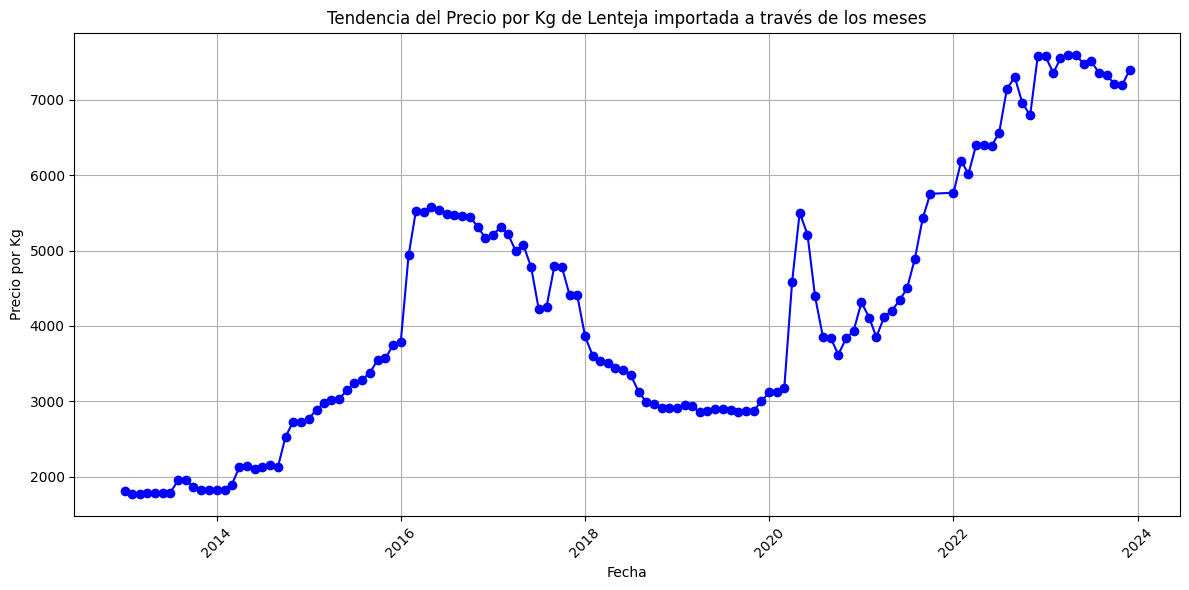

In [272]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para un producto específico
producto_especifico ='Lenteja importada' #'Café molido'#'Azúcar sulfitada'  # Reemplaza con el nombre del producto que deseas analizar
df_producto = df_general[df_general['Producto'] == producto_especifico]

# Convertir la columna 'Fecha' a formato de fecha
df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])

# Extraer año y mes de la columna 'Fecha'
df_producto['Año'] = df_producto['Fecha'].dt.year
df_producto['Mes'] = df_producto['Fecha'].dt.month

# Agrupar por Año y Mes y calcular el promedio de Precio por Kg
precio_promedio_mensual = df_producto.groupby(['Año', 'Mes'])['Precio_kg'].mean().reset_index()

# Crear una nueva columna de fecha para el eje x
# The problem was here: pd.to_datetime expects the columns to be named 'year', 'month', and 'day'
# Renaming the columns to match the expected names
precio_promedio_mensual['Fecha'] = pd.to_datetime(precio_promedio_mensual[['Año', 'Mes']].rename(columns={'Año': 'year', 'Mes': 'month'}).assign(day=1))


# Graficar la línea de tendencia
plt.figure(figsize=(12, 6))
plt.plot(precio_promedio_mensual['Fecha'], precio_promedio_mensual['Precio_kg'], marker='o', linestyle='-', color='b')
plt.title(f'Tendencia del Precio por Kg de {producto_especifico} a través de los meses')
plt.xlabel('Fecha')
plt.ylabel('Precio por Kg')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Ajusta el layout para que no se superpongan los elementos
plt.show()

<ipython-input-267-dcfbcc583f9e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])
<ipython-input-267-dcfbcc583f9e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Año'] = df_producto['Fecha'].dt.year


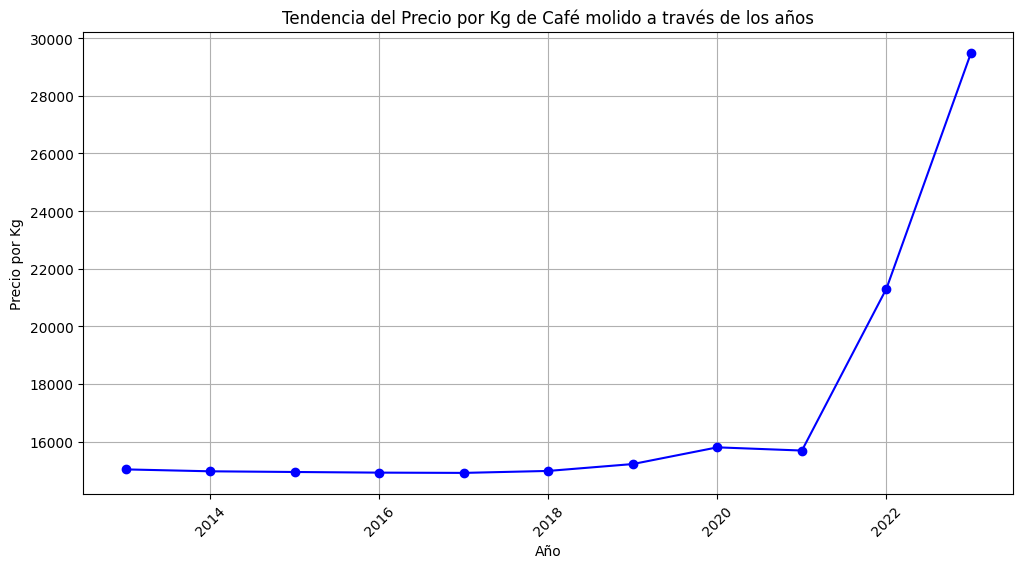

In [267]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para un producto específico
producto_especifico = 'Café molido'  # Reemplaza con el nombre del producto que deseas analizar
df_producto = df_general[df_general['Producto'] == producto_especifico]

# Convertir la columna 'Fecha' a formato de fecha y extraer el año
df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])
df_producto['Año'] = df_producto['Fecha'].dt.year

# Calcular el promedio de Precio por Kg para cada año
precio_promedio_anual = df_producto.groupby('Año')['Precio_kg'].mean()

# Graficar la línea de tendencia
plt.figure(figsize=(12, 6))
plt.plot(precio_promedio_anual.index, precio_promedio_anual.values, marker='o', linestyle='-', color='b')
plt.title(f'Tendencia del Precio por Kg de {producto_especifico} a través de los años')
plt.xlabel('Año')
plt.ylabel('Precio por Kg')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-279-6889f013e38c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto_1['Fecha'] = pd.to_datetime(df_producto_1['Fecha'])
<ipython-input-279-6889f013e38c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto_1['Año'] = df_producto_1['Fecha'].dt.year
<ipython-input-279-6889f013e38c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

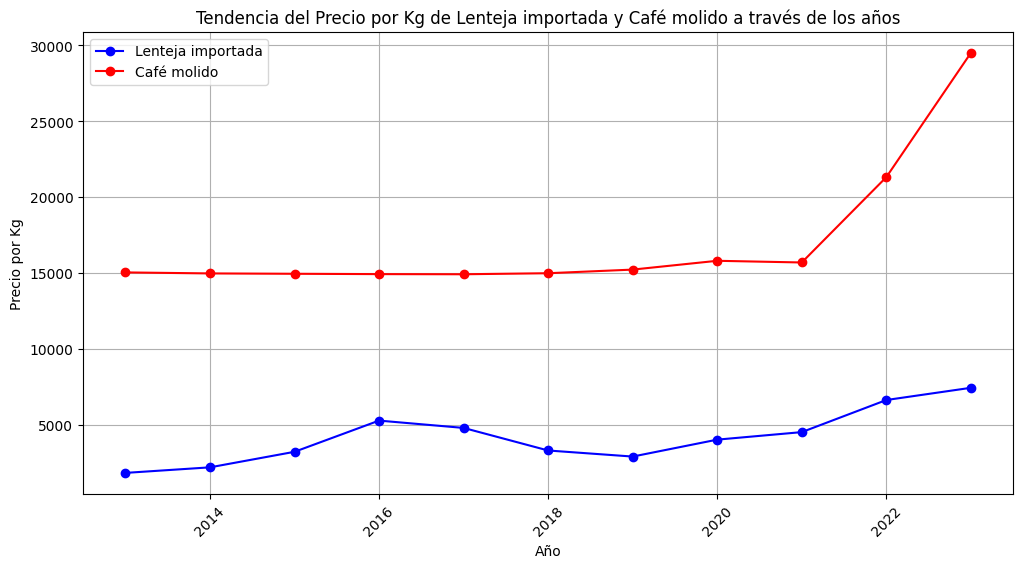

In [279]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para cada producto específico
producto_1 = 'Lenteja importada'  # Primer producto a analizar
producto_2 = 'Café molido'       # Segundo producto a analizar (cambia por el que desees)

# Filtrar los datos de cada producto
df_producto_1 = df_general[df_general['Producto'] == producto_1]
df_producto_2 = df_general[df_general['Producto'] == producto_2]

# Convertir la columna 'Fecha' a formato de fecha y extraer el año para ambos productos
df_producto_1['Fecha'] = pd.to_datetime(df_producto_1['Fecha'])
df_producto_1['Año'] = df_producto_1['Fecha'].dt.year

df_producto_2['Fecha'] = pd.to_datetime(df_producto_2['Fecha'])
df_producto_2['Año'] = df_producto_2['Fecha'].dt.year

# Calcular el promedio de Precio por Kg para cada año en ambos productos
precio_promedio_anual_1 = df_producto_1.groupby('Año')['Precio_kg'].mean()
precio_promedio_anual_2 = df_producto_2.groupby('Año')['Precio_kg'].mean()

# Graficar ambas líneas de tendencia en la misma figura
plt.figure(figsize=(12, 6))

# Línea de tendencia para el primer producto
plt.plot(precio_promedio_anual_1.index, precio_promedio_anual_1.values, marker='o', linestyle='-', color='b', label=producto_1)

# Línea de tendencia para el segundo producto
plt.plot(precio_promedio_anual_2.index, precio_promedio_anual_2.values, marker='o', linestyle='-', color='r', label=producto_2)

# Personalizar el gráfico
plt.title(f'Tendencia del Precio por Kg de {producto_1} y {producto_2} a través de los años')
plt.xlabel('Año')
plt.ylabel('Precio por Kg')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # Agregar leyenda para identificar cada línea
plt.show()


<ipython-input-280-58a5ea7e15dc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])
<ipython-input-280-58a5ea7e15dc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Año'] = df_producto['Fecha'].dt.year
<ipython-input-280-58a5ea7e15dc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=

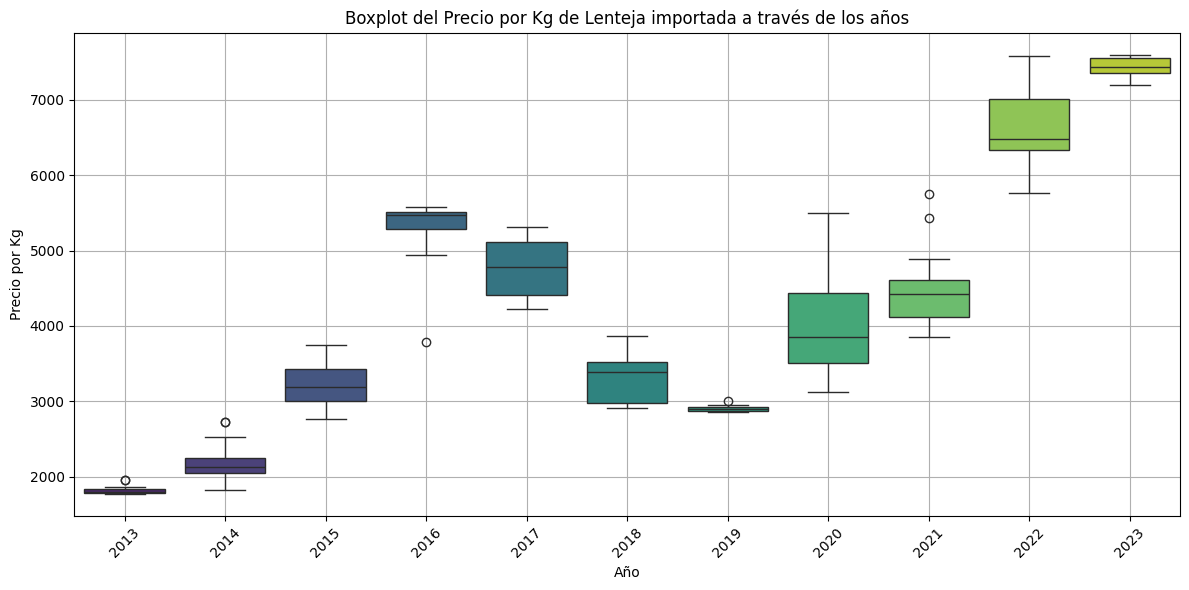

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_general es tu DataFrame
# df_general = pd.read_csv('ruta/a/tu/archivo.csv')  # Cargar el DataFrame si es necesario

# Filtrar el DataFrame para un producto específico
producto_especifico = 'Lenteja importada'  # Reemplaza con el nombre del producto que deseas analizar
df_producto = df_general[df_general['Producto'] == producto_especifico]

# Convertir la columna 'Fecha' a formato de fecha y extraer el año
df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])
df_producto['Año'] = df_producto['Fecha'].dt.year

# Crear una paleta de colores
num_años = df_producto['Año'].nunique()  # Número de años únicos en los datos
palette = sns.color_palette("viridis", num_años)  # Generar colores usando la paleta viridis

# Graficar el boxplot con colores
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Precio_kg', data=df_producto, palette=palette)

# Añadir título y etiquetas
plt.title(f'Boxplot del Precio por Kg de {producto_especifico} a través de los años')
plt.xlabel('Año')
plt.ylabel('Precio por Kg')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()  # Ajusta el layout para que no se superpongan los elementos
plt.show()


<ipython-input-277-9ec1b2ddf560>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])
<ipython-input-277-9ec1b2ddf560>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Año'] = df_producto['Fecha'].dt.year


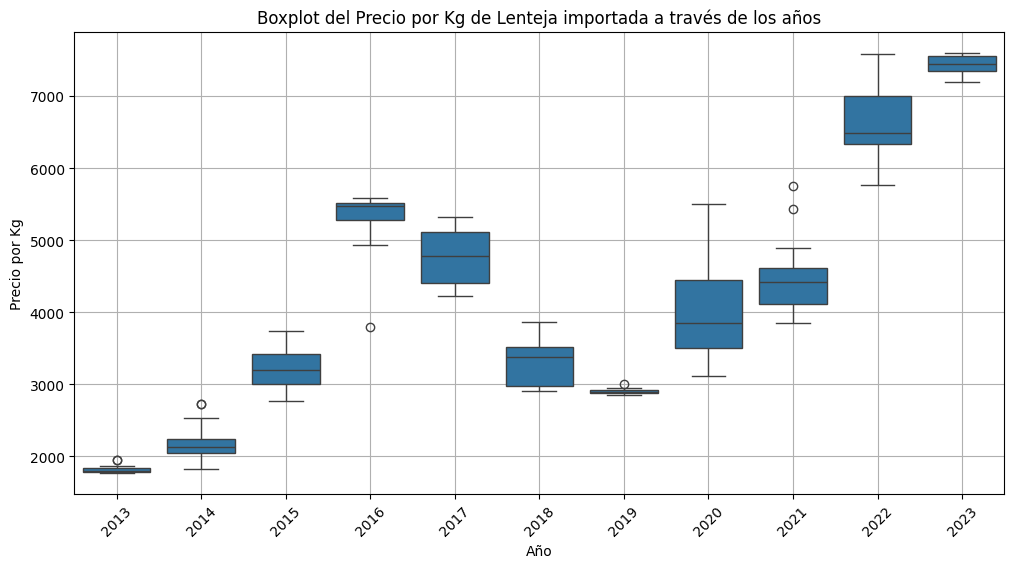

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_general es tu DataFrame
# df_general = pd.read_csv('ruta/a/tu/archivo.csv')  # Cargar el DataFrame si es necesario

# Filtrar el DataFrame para un producto específico
producto_especifico = 'Lenteja importada'  # Reemplaza con el nombre del producto que deseas analizar
df_producto = df_general[df_general['Producto'] == producto_especifico]

# Convertir la columna 'Fecha' a formato de fecha y extraer el año
df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])
df_producto['Año'] = df_producto['Fecha'].dt.year

# Graficar el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Precio_kg', data=df_producto)
plt.title(f'Boxplot del Precio por Kg de {producto_especifico} a través de los años')
plt.xlabel('Año')
plt.ylabel('Precio por Kg')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-276-7d041ceaae55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])
<ipython-input-276-7d041ceaae55>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Mes'] = df_producto['Fecha'].dt.month


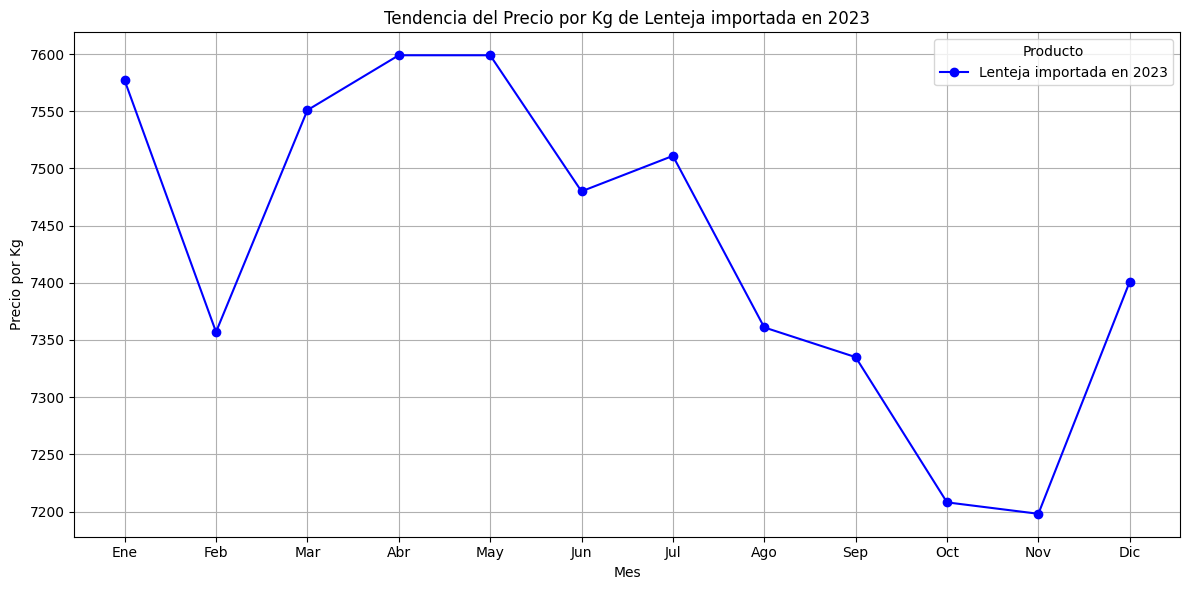

In [276]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para un producto específico y un año específico
producto_especifico = 'Lenteja importada'  # Reemplaza con el nombre del producto que deseas analizar
anio_especifico = 2023  # Reemplaza con el año que deseas analizar
df_producto = df_general[(df_general['Producto'] == producto_especifico) & (df_general['Fecha'].dt.year == anio_especifico)]

# Convertir la columna 'Fecha' a formato de fecha
df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])

# Extraer el mes de la columna 'Fecha'
df_producto['Mes'] = df_producto['Fecha'].dt.month

# Agrupar los datos por mes para calcular el precio promedio por kilogramo
precio_promedio_mensual = df_producto.groupby('Mes')['Precio_kg'].mean().reset_index()

# Crear el gráfico de líneas de tendencia con un solo color
plt.figure(figsize=(12, 6))

# Graficar la línea de tendencia utilizando un solo color (por ejemplo, azul)
plt.plot(precio_promedio_mensual['Mes'], precio_promedio_mensual['Precio_kg'], marker='o', color='b', label=f'{producto_especifico} en {anio_especifico}')

# Añadir etiquetas y título
plt.title(f'Tendencia del Precio por Kg de {producto_especifico} en {anio_especifico}')
plt.xlabel('Mes')
plt.ylabel('Precio por Kg')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True)

# Añadir leyenda
plt.legend(title='Producto')

# Mostrar la gráfica
plt.tight_layout()  # Ajusta el layout para que no se superpongan los elementos
plt.show()


<ipython-input-274-ded504d9d423>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])
<ipython-input-274-ded504d9d423>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producto['Mes'] = df_producto['Fecha'].dt.month


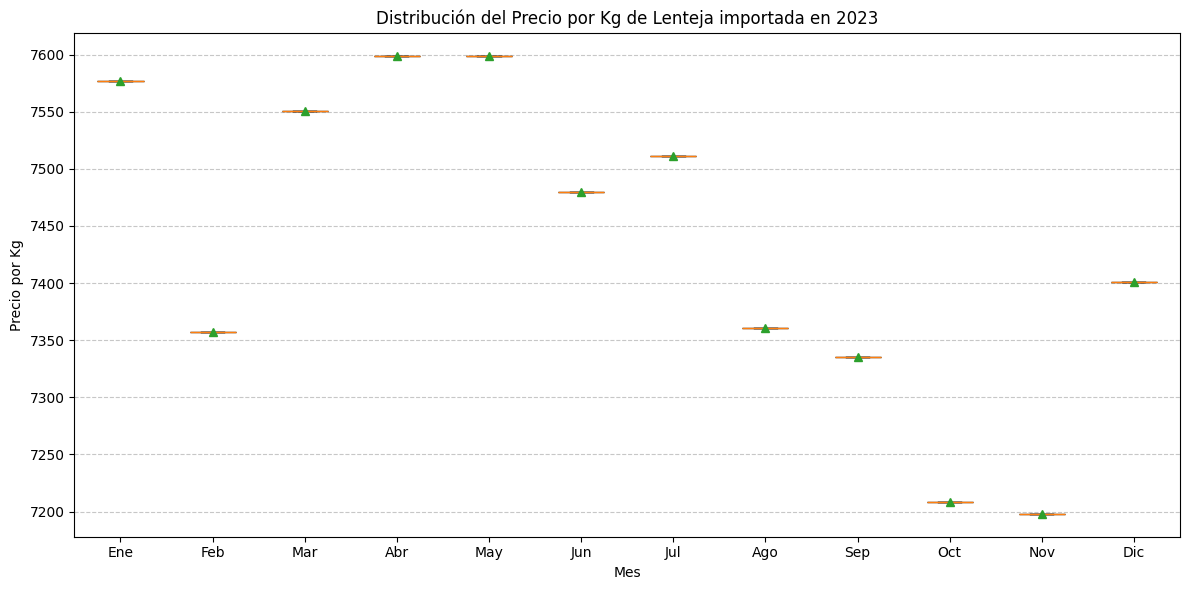

In [274]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para un producto específico y un año específico
producto_especifico = 'Lenteja importada'  # Reemplaza con el nombre del producto que deseas analizar
anio_especifico = 2023  # Reemplaza con el año que deseas analizar
df_producto = df_general[(df_general['Producto'] == producto_especifico) & (df_general['Fecha'].dt.year == anio_especifico)]

# Convertir la columna 'Fecha' a formato de fecha
df_producto['Fecha'] = pd.to_datetime(df_producto['Fecha'])

# Extraer el mes de la columna 'Fecha'
df_producto['Mes'] = df_producto['Fecha'].dt.month

# Agrupar los datos por mes para el boxplot
data_por_mes = [df_producto[df_producto['Mes'] == mes]['Precio_kg'] for mes in range(1, 13)]

# Crear el boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(data_por_mes, patch_artist=True, showmeans=True)

# Colorear cada caja
colors = plt.cm.viridis(range(12))  # Generar colores
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Añadir etiquetas y título
plt.title(f'Distribución del Precio por Kg de {producto_especifico} en {anio_especifico}')
plt.xlabel('Mes')
plt.ylabel('Precio por Kg')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()  # Ajusta el layout para que no se superpongan los elementos
plt.show()


# Codificacion
Para trabajar con datos en machine learning es necesario codificar la informacion para poderlos manipular. por lo tanto se procede a codificar cada columna del df_general

In [281]:
df_general  #  df_general donde se indica la informacion sin codificar

,Fecha,Grupo,Producto,Mercado,Precio_kg,Mes,Año
0,2013-01-01,CARNES,"Carne de cerdo, espinazo","Manizales, Centro Galerías",7000.000000,1,2013
1,2013-01-01,CARNES,"Carne de cerdo, lomo sin hueso","Manizales, Centro Galerías",1300.000000,1,2013
2,2013-01-01,CARNES,"Carne de cerdo, pernil sin hueso","Manizales, Centro Galerías",11100.000000,1,2013
3,2013-01-01,CARNES,"Carne de cerdo, tocino papada","Manizales, Centro Galerías",8000.000000,1,2013
4,2013-01-01,FRUTAS,Banano criollo,"Manizales, Centro Galerías",495.000000,1,2013
...,...,...,...,...,...,...,...
10951,2023-12-01,PROCESADOS,Sal yodada,"Manizales, Centro Galerías",2040.000000,12,2023
10952,2023-12-01,PROCESADOS,Sardinas en lata,"Manizales, Centro Galerías",1650.300000,12,2023
10953,2023-01-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",1353.027273,1,2023
10954,2023-01-01,PROCESADOS,Margarina,"Manizales, Centro Galerías",1575.709091,1,2023


In [282]:
# @title Convertir a datos categoricos las columnas de Grupo y Producto
df_general['Grupo'] = df_general['Grupo'].astype('category')
df_general['Producto'] = df_general['Producto'].astype('category')

### Codificacion para las fecha  ( Se ubica despues de concatenar los df, para graficar )

In [283]:
# import pandas as pd
# import category_encoders as ce

# # Mapeo de los meses en español a inglés, incluyes 'sept'
# month_mapping = {
#     'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr',
#     'may': 'May', 'jun': 'Jun', 'jul': 'Jul', 'ago': 'Aug',
#     'sep': 'Sep', #'sept': 'Sep',  # Aseguramos que 'sept' se mapee correctamente a 'Sep'
#     'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
# }

# # Aplicamos el mapeo a la columna "Fecha"
# df_general['Fecha'] = df_general['Fecha'].str.replace(
#     '|'.join(month_mapping.keys()),
#     lambda x: month_mapping[x.group(0)],
#     regex=True
# )

# # Convertir la columna "Fecha" a datetime, pero no eliminar las fechas inválidas
# df_general['Fecha'] = pd.to_datetime(df_general['Fecha'], format='%b-%y', errors='coerce')

# # Ver filas que no pudieron ser convertidas (NaT)
# nat_rows = df_general[df_general['Fecha'].isna()]
# if not nat_rows.empty:
#     print("Advertencia: Se encontraron fechas no válidas que no fueron convertidas:")
#     print(nat_rows[['Fecha']])
# else:
#     print("Todas las fechas fueron convertidas exitosamente.")

# # Continuamos sin eliminar las filas con NaT en "Fecha"
# # Pero puedes optar por corregir manualmente esas fechas si lo deseas

# # Extraer el mes y el año de la columna 'Fecha', manejando NaT como sea necesario
# df_general['Mes'] = df_general['Fecha'].dt.month
# df_general['Año'] = df_general['Fecha'].dt.year

# # Los NaT seguirán en las filas, pero puedes optar por imputar, corregir manualmente, o simplemente ignorar esas filas más adelante.
# df_general.shape

In [284]:
# Definir el producto y la fecha específicos
producto_especifico = 'Manteca'
# fecha_especifica = '2023-10-01'
# Generar automáticamente la lista de años
anios_especificos = list(range(2013, 2023 + 1))  # Incluye ambos extremos
resultado = df_general[(df_general['Producto'] == producto_especifico ) &
                       (df_general['Fecha'].dt.year.isin(anios_especificos))]
resultado

,Fecha,Grupo,Producto,Mercado,Precio_kg,Mes,Año
48,2013-01-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",4460.000000,1,2013
131,2013-02-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",4350.000000,2,2013
214,2013-03-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",4300.000000,3,2013
297,2013-04-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",4333.000000,4,2013
380,2013-05-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",4333.000000,5,2013
...,...,...,...,...,...,...,...
10699,2023-09-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",1373.300000,9,2023
10782,2023-10-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",1312.200000,10,2023
10865,2023-11-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",1168.700000,11,2023
10948,2023-12-01,PROCESADOS,Manteca,"Manizales, Centro Galerías",1168.900000,12,2023


<ipython-input-285-abf695d5eed3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado['Año'] = resultado['Fecha'].dt.year
<ipython-input-285-abf695d5eed3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Año', y='Precio_kg', data=resultado, palette='Set2')


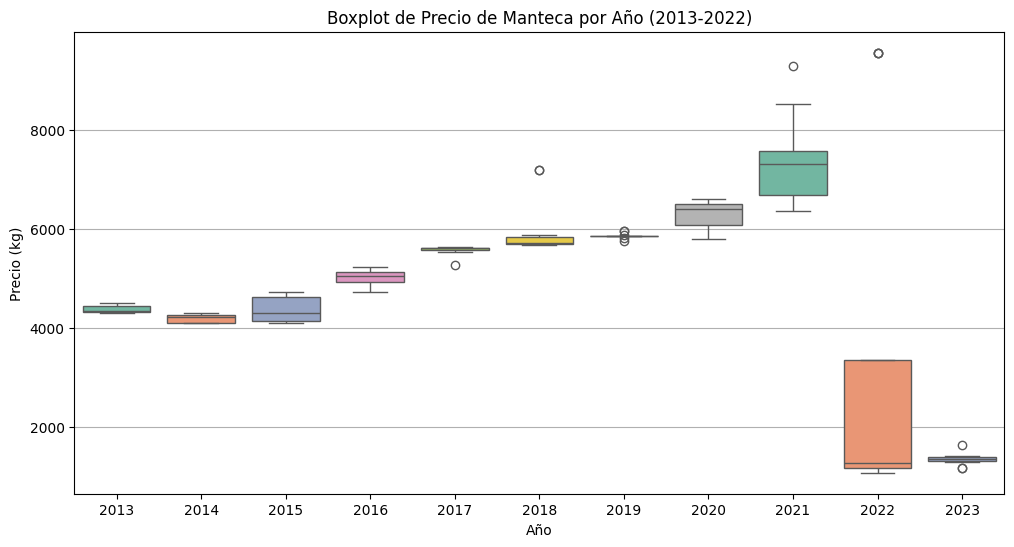

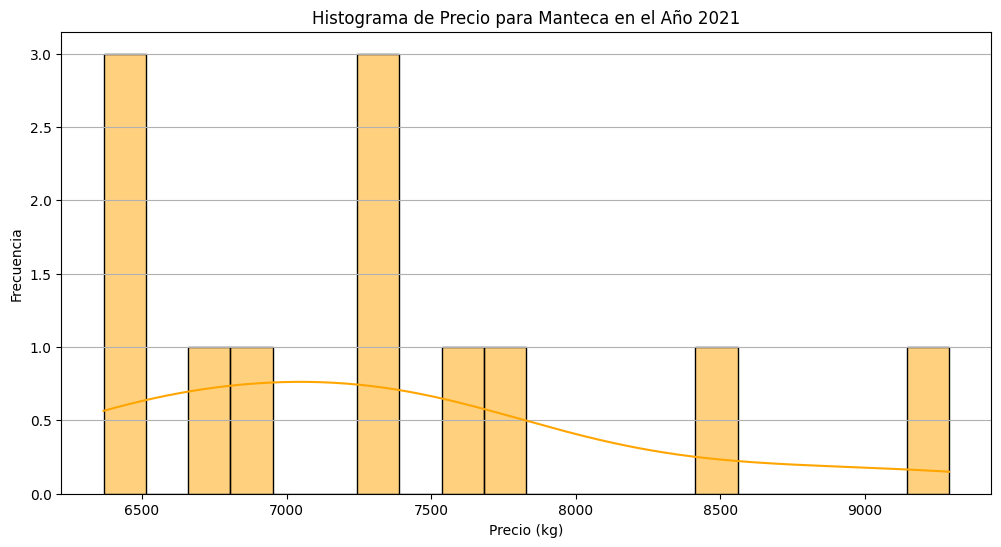

In [285]:
# Extraer el año para facilitar el análisis
resultado['Año'] = resultado['Fecha'].dt.year

# Graficar boxplot para cada año
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Precio_kg', data=resultado, palette='Set2')
plt.title(f'Boxplot de Precio de {producto_especifico} por Año (2013-2022)')
plt.xlabel('Año')
plt.ylabel('Precio (kg)')
plt.grid(axis='y')
plt.show()

# Graficar un histograma para un año específico (por ejemplo, 2022)
anio_especifico = 2021
plt.figure(figsize=(12, 6))
sns.histplot(resultado[resultado['Año'] == anio_especifico]['Precio_kg'], bins=20, color='orange', kde=True)
plt.title(f'Histograma de Precio para {producto_especifico} en el Año {anio_especifico}')
plt.xlabel('Precio (kg)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

### Codificacion para las columnas Grupo, Producto, Mercado:

Se utiliza el metodo de One-Hot encoder para las columnas de Grupo y Producto.
Teniendo en cuenta que se analiza solo para Manizales no es necesario tener codificada la columna de Mercado ya que solo existe un solo valor unico

In [286]:
# Crear un codificador para las columnas 'Grupo' y 'Producto'
codificador = OneHotEncoder(drop='first')  # drop='first' para evitar multicolinealidad

# Aplicar One-Hot Encoding
df_encoded = codificador.fit_transform(df_general[['Grupo', 'Producto']])

# Convertir el resultado en DataFrame y asignar nombres de columnas
nuevas_columnas = pd.DataFrame(df_encoded.toarray(), columns=codificador.get_feature_names_out(['Grupo', 'Producto']))

# Concatenar las nuevas columnas con el DataFrame original
df_general = pd.concat([df_general.reset_index(drop=True), nuevas_columnas.reset_index(drop=True)], axis=1)

# Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = df_general.select_dtypes(include=['number'])

In [287]:
# @title Filtrar los datos para el año 2023
anio_especifico = 2023
datos_2023 = df_general[df_general['Fecha'].dt.year == anio_especifico]

# Eliminar los datos del año 2020 del DataFrame original
df_general = df_general[df_general['Fecha'].dt.year != anio_especifico]


## Se Guarda un df general donde se tiene toda la informacion codificada

In [288]:
from google.colab import drive
drive.mount('/content/drive')

# Guardar el resultado en un archivo CSV
df_general.to_csv('/content/drive/MyDrive/Talento Tech/Proyecto IA/Base de datos final/datos_manizales_completados_Codificado.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Seccion 2
Mapa de calor con  la correlacion

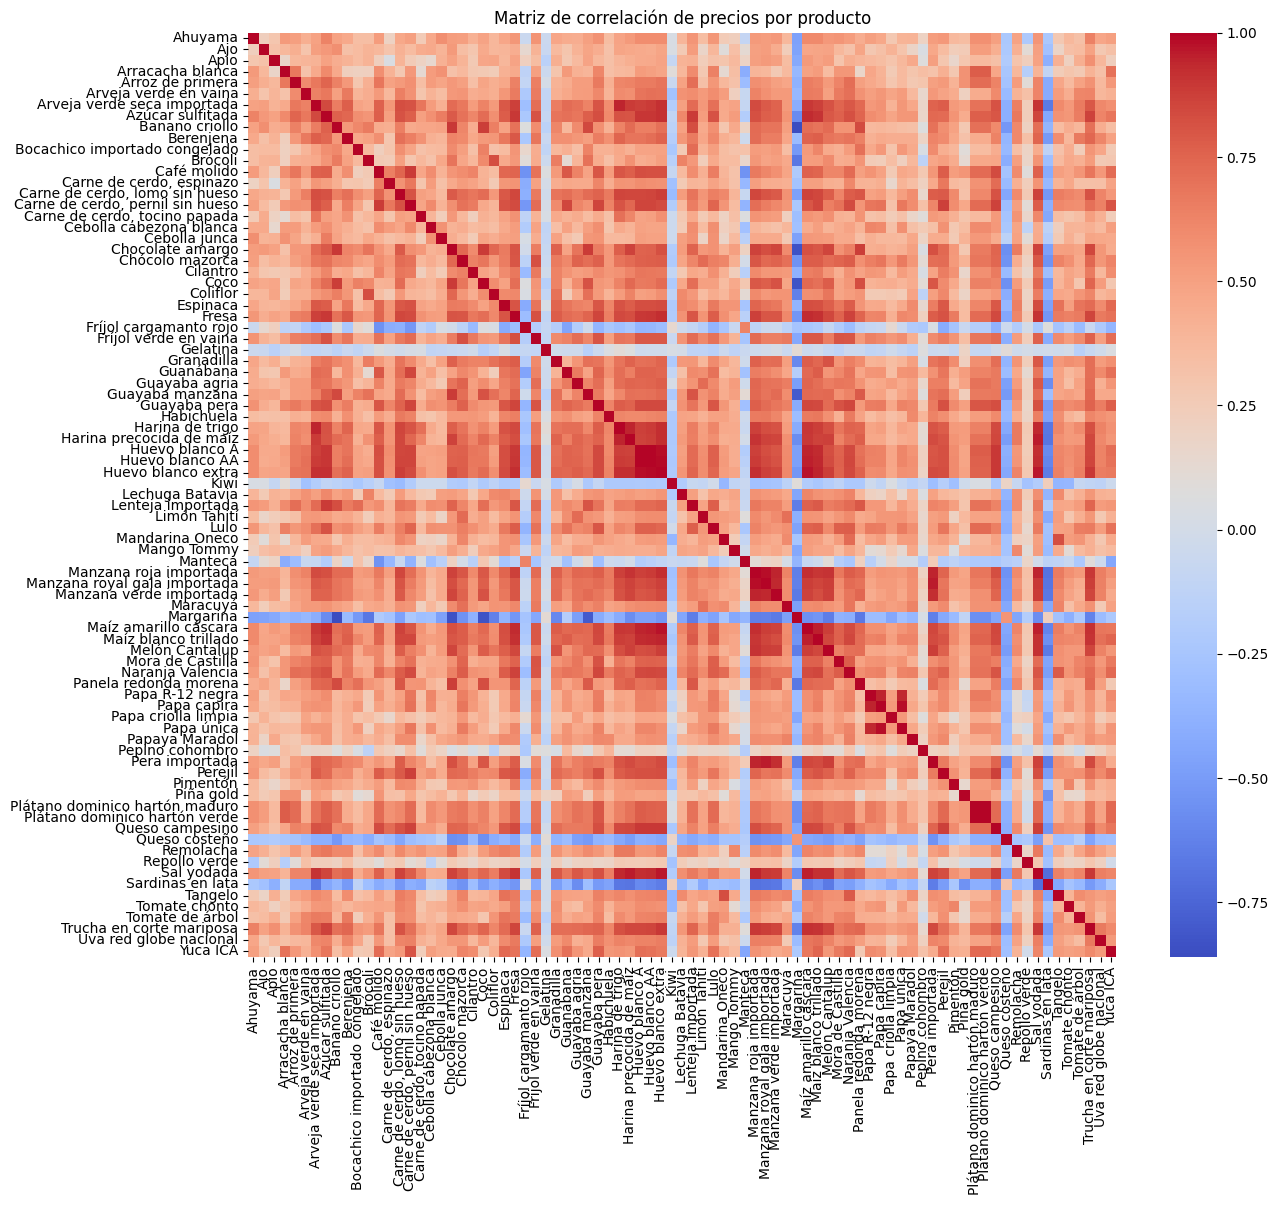

In [289]:
# Crear un defaultdict para almacenar precios de cada producto
productos_precios_dict = defaultdict(list)

# Ordenar el DataFrame por 'Producto' y 'Fecha'
df_general = df_general.sort_values(by=['Producto', 'Fecha'])

# Recorrer el DataFrame y llenar el defaultdict
for _, row in df_general.iterrows():
    producto = row['Producto']
    precio = row['Precio_kg']
    productos_precios_dict[producto].append(precio) #falta ordenar por fecha todos los vecotres o al menos no esta especificado

# Ajustar las listas de precios para que todas tengan la misma longitud
max_length = max(len(precios) for precios in productos_precios_dict.values())
for producto, precios in productos_precios_dict.items():
    precios.extend([np.nan] * (max_length - len(precios)))  # Rellenar con NaN si es necesario

# Convertir el defaultdict a un DataFrame
productos_precios_df = pd.DataFrame(productos_precios_dict)

# Rellenar valores NaN con 0 o el valor deseado
productos_precios_df = productos_precios_df.fillna(0)

# Calcular la matriz de correlación entre los vectores de precios
correlation_matrix = productos_precios_df.corr()

# Graficar el mapa de calor de la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, xticklabels=productos_precios_df.columns, yticklabels=productos_precios_df.columns)
plt.title('Matriz de correlación de precios por producto')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [290]:
productos_precios_df

,Ahuyama,Ajo,Apio,Arracacha blanca,Arroz de primera,Arveja verde en vaina,Arveja verde seca importada,Azúcar sulfitada,Banano criollo,Berenjena,...,Remolacha,Repollo verde,Sal yodada,Sardinas en lata,Tangelo,Tomate chonto,Tomate de árbol,Trucha en corte mariposa,Uva red globe nacional,Yuca ICA
0,795.0,3729.0,896.0,1304.0,2619.0,1778.0,1708.0,1519.0,495.0,1850.0,...,785.0,907.0,797.0,6406.0,1578.0,1551.0,854.0,1200.000000,3681.0,1404.0
1,800.0,3750.0,868.0,1245.0,2487.0,2260.0,1721.0,1493.0,500.0,2000.0,...,721.0,762.0,800.0,6260.0,1466.0,1475.0,1038.0,1193.754545,3600.0,1358.0
2,737.0,3799.0,909.0,1233.0,2400.0,2726.0,1879.0,1497.0,508.0,2000.0,...,697.0,764.0,800.0,6165.0,1530.0,1400.0,1190.0,1200.000000,2960.0,1152.0
3,700.0,3771.0,880.0,1250.0,2347.0,2592.0,2160.0,1660.0,550.0,2000.0,...,671.0,819.0,800.0,6138.0,1724.0,1820.0,1472.0,1200.000000,2951.0,1067.0
4,608.0,3757.0,880.0,1159.0,2347.0,2672.0,2550.0,1697.0,550.0,2000.0,...,714.0,701.0,800.0,6124.0,1489.0,1800.0,1524.0,1181.300000,2954.0,1016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1500.0,7847.0,1908.0,4032.0,3595.0,5326.0,4774.0,4547.0,1350.0,3000.0,...,4477.0,1473.0,1797.0,1534.3,4167.0,2366.0,3157.0,1950.000000,9967.0,3480.0
116,1369.0,8808.0,1825.0,4325.0,3640.0,6242.0,4978.0,4496.0,1350.0,2833.0,...,4614.0,1133.0,1810.0,1593.8,3144.0,2045.0,3143.0,1950.000000,1013.8,3010.0
117,1664.0,9537.0,1724.0,4283.0,3920.0,5529.0,4070.0,4513.0,1394.0,2833.0,...,4364.0,836.0,1806.0,1789.9,2752.0,1905.0,2666.0,2075.000000,7233.0,3096.0
118,1833.0,9453.0,1627.0,4462.0,4045.0,5779.0,4528.0,4488.0,1338.0,2500.0,...,2961.0,562.0,1805.0,1803.3,2229.0,1898.0,2054.0,2450.000000,5988.0,3200.0


In [291]:
# import pandas as pd
# import numpy as np
# from collections import defaultdict
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 1. Ordenar el DataFrame por fecha para asegurar que los datos están en orden cronológico.
# df_general = df_general.sort_values(by='Fecha').reset_index(drop=True)

# # 2. Usar pivot table para organizar los datos de forma que cada producto tenga un vector de precios alineado cronológicamente.
# # Esto crea un DataFrame donde cada columna es un producto y cada fila es una fecha (con valores de Precio_kg).
# productos_precios_df = df_general.pivot_table(index='Fecha', columns='Producto', values='Precio_kg')

# # 3. Rellenar los valores NaN con interpolación, para que las tendencias temporales se mantengan (evita rellenar con 0).
# productos_precios_df = productos_precios_df.interpolate(method='linear', axis=0).fillna(0)

# # 4. Calcular la matriz de correlación entre los vectores de precios de los productos.
# correlation_matrix = productos_precios_df.corr()

# # 5. Graficar el mapa de calor de la matriz de correlación.
# plt.figure(figsize=(14, 12))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True,
#             xticklabels=productos_precios_df.columns, yticklabels=productos_precios_df.columns)
# plt.title('Matriz de correlación de precios por producto')
# plt.xticks(rotation=90)
# plt.yticks(rotation=0)
# plt.show()


In [292]:
productos_precios_df

,Ahuyama,Ajo,Apio,Arracacha blanca,Arroz de primera,Arveja verde en vaina,Arveja verde seca importada,Azúcar sulfitada,Banano criollo,Berenjena,...,Remolacha,Repollo verde,Sal yodada,Sardinas en lata,Tangelo,Tomate chonto,Tomate de árbol,Trucha en corte mariposa,Uva red globe nacional,Yuca ICA
0,795.0,3729.0,896.0,1304.0,2619.0,1778.0,1708.0,1519.0,495.0,1850.0,...,785.0,907.0,797.0,6406.0,1578.0,1551.0,854.0,1200.000000,3681.0,1404.0
1,800.0,3750.0,868.0,1245.0,2487.0,2260.0,1721.0,1493.0,500.0,2000.0,...,721.0,762.0,800.0,6260.0,1466.0,1475.0,1038.0,1193.754545,3600.0,1358.0
2,737.0,3799.0,909.0,1233.0,2400.0,2726.0,1879.0,1497.0,508.0,2000.0,...,697.0,764.0,800.0,6165.0,1530.0,1400.0,1190.0,1200.000000,2960.0,1152.0
3,700.0,3771.0,880.0,1250.0,2347.0,2592.0,2160.0,1660.0,550.0,2000.0,...,671.0,819.0,800.0,6138.0,1724.0,1820.0,1472.0,1200.000000,2951.0,1067.0
4,608.0,3757.0,880.0,1159.0,2347.0,2672.0,2550.0,1697.0,550.0,2000.0,...,714.0,701.0,800.0,6124.0,1489.0,1800.0,1524.0,1181.300000,2954.0,1016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1500.0,7847.0,1908.0,4032.0,3595.0,5326.0,4774.0,4547.0,1350.0,3000.0,...,4477.0,1473.0,1797.0,1534.3,4167.0,2366.0,3157.0,1950.000000,9967.0,3480.0
116,1369.0,8808.0,1825.0,4325.0,3640.0,6242.0,4978.0,4496.0,1350.0,2833.0,...,4614.0,1133.0,1810.0,1593.8,3144.0,2045.0,3143.0,1950.000000,1013.8,3010.0
117,1664.0,9537.0,1724.0,4283.0,3920.0,5529.0,4070.0,4513.0,1394.0,2833.0,...,4364.0,836.0,1806.0,1789.9,2752.0,1905.0,2666.0,2075.000000,7233.0,3096.0
118,1833.0,9453.0,1627.0,4462.0,4045.0,5779.0,4528.0,4488.0,1338.0,2500.0,...,2961.0,562.0,1805.0,1803.3,2229.0,1898.0,2054.0,2450.000000,5988.0,3200.0


# Regrecion lineal multiple

In [312]:
df_general

,Fecha,Grupo,Producto,Mercado,Precio_kg,Mes,Año,Grupo_FRUTAS,Grupo_GRANOS Y CEREALES,Grupo_LACTEOS Y HUEVOS,...,Producto_Remolacha,Producto_Repollo verde,Producto_Sal yodada,Producto_Sardinas en lata,Producto_Tangelo,Producto_Tomate chonto,Producto_Tomate de árbol,Producto_Trucha en corte mariposa,Producto_Uva red globe nacional,Producto_Yuca ICA
61,2013-01-01,VERDURAS Y HORTALIZAS,Ahuyama,"Manizales, Centro Galerías",795.0,1,2013,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,2013-02-01,VERDURAS Y HORTALIZAS,Ahuyama,"Manizales, Centro Galerías",800.0,2,2013,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,2013-03-01,VERDURAS Y HORTALIZAS,Ahuyama,"Manizales, Centro Galerías",737.0,3,2013,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,2013-04-01,VERDURAS Y HORTALIZAS,Ahuyama,"Manizales, Centro Galerías",700.0,4,2013,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,2013-05-01,VERDURAS Y HORTALIZAS,Ahuyama,"Manizales, Centro Galerías",608.0,5,2013,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,2022-08-01,"TUBERCULOS, RAICES Y PLATANOS",Yuca ICA,"Manizales, Centro Galerías",3480.0,8,2022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9677,2022-09-01,"TUBERCULOS, RAICES Y PLATANOS",Yuca ICA,"Manizales, Centro Galerías",3010.0,9,2022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9760,2022-10-01,"TUBERCULOS, RAICES Y PLATANOS",Yuca ICA,"Manizales, Centro Galerías",3096.0,10,2022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9843,2022-11-01,"TUBERCULOS, RAICES Y PLATANOS",Yuca ICA,"Manizales, Centro Galerías",3200.0,11,2022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [313]:
# Separate features and labels
X, y = productos_precios_df[productos_precios_df.columns].values, productos_precios_df['Lenteja importada'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[  795.          3729.           896.          1304.
   2619.          1778.          1708.          1519.
    495.          1850.          6013.          2311.
  15233.          7000.          1300.         11100.
   8000.           928.          1185.         16717.
    541.          2763.          1570.          1596.
   2963.          3744.          4667.          1903.
   9124.          2107.          1998.          2126.
   1381.          1027.          1253.          1900.
   2662.           210.           222.           250.
   4558.          1313.          1811.           702.
   1700.          1416.          1144.          4460.
   3751.          4030.          4267.          1256.
   8600.           981.          1229.          1394.
   2506.           590.          1767.           516.
    506.          1711.           434.          1025.
   1299.          3665.          3600.          1553.
   1653.           570.           570.          6575.
   8930.          

In [314]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 84 rows
Test Set: 36 rows


In [315]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [316]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [5209. 3834. 3936. 1954. 4512. 2731. 1951. 1825. 5449. 5213.]
Actual labels   :  [5209.  3834.  3936.  1954.  4511.6 2731.  1951.  1825.  5449.  5213. ]


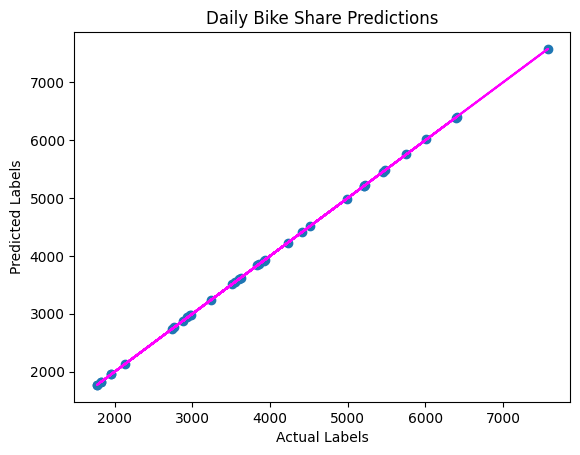

In [317]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [318]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 2.2796241779799842e-20
RMSE: 1.5098424348189397e-10
R2: 1.0


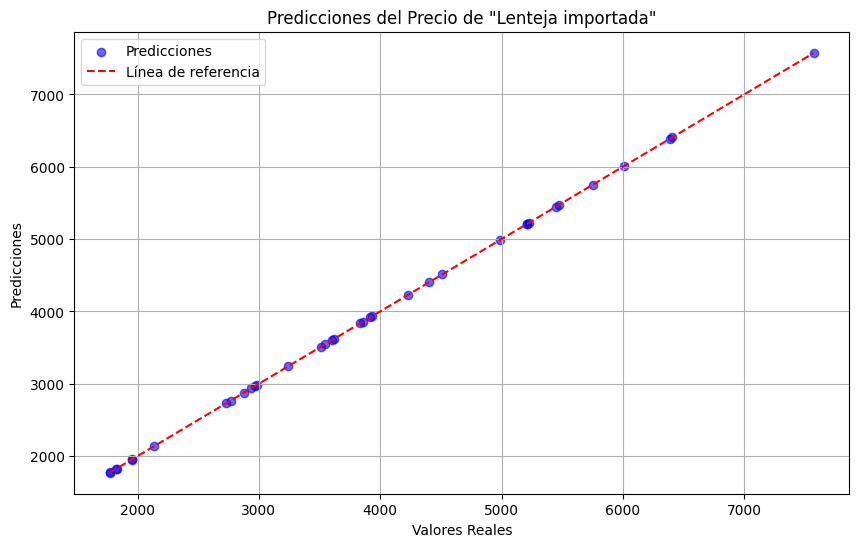

In [323]:
# 5. Visualización de las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))

# Graficar los valores reales de la "Papa criolla limpia" (en el conjunto de prueba)
plt.scatter(y_test, predictions, color='blue', label='Predicciones', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de referencia')

# Configuraciones del gráfico
plt.title('Predicciones del Precio de "Lenteja importada"')
plt.ylabel('Predicciones')
plt.xlabel('Valores Reales')
plt.legend()
plt.grid(True)
plt.show()